# Car CO2 Emission Prediction: A Comparison of Regularization Methods on Linear Regression

<img src="co2_emissions.jpg" 
     align="center" 
     width="600" />

# Introduction

**Project Overview**  
In this project, we're trying to predict how much CO2 cars release. We're using a dataset from the Canadian Government that includes info like the car's make, model, fuel type, transmission, and gas consumption. The goal is to understand how these details relate to CO2 emissions and create a model to predict them.

We care about the environment, and by studying these factors, we hope to help make cars more eco-friendly. Our project is part of a bigger effort to reduce the pollution caused by vehicles. We analyze the dataset to identify factors influencing CO2 emissions and building a model to predict emissions. The idea is to encourage practices that lead to a cleaner, healthier environment.

**Objective of this Notebook**  
The primary goal of this notebook is to provide a detailed implementation of regularization for linear regression, comparing their results and efficiencies. The implementation covers the need for regularization, explicit data analysis, and the challenges encountered during the process. Regularization is crucial especially for dealing with overfitting and improving generalization capabilities for models. 

**Data Preprocessing and Exploratory Data Analysis**  
The dataset is clean, requiring minimal preprocessing. On the other hand, with its current form it will be massive after encoding. We carefully handled categorical features, which is a core part of this dataset and project. We looked for the best combination for the trade-off between cost of the model and the performance.

The initial exploration revealed that 'fuel consumption per mile' exhibited the highest correlation with the target CO2 emissions. Engine size and cylinder count also showed strong correlations. However, the analysis highlighted the presence of multicollinearity. Addressing this issue involved dropping certain columns to enhance model performance.

**Handling Categorical Features**  
Due to the numerous unique values in categorical columns, encoding would expand the dataset to over 2000 columns. Initial attempts with simple and multiple linear regression proved ineffective due to the vast number of features. Although, regularization may help to decrease the complexity, working with 2000+ features is a costly way. That's the reason we regrouped some variables and removed some of them with feature engineering

**Regularization Implementation**  
After reducing the number of features Linear Regression was performing well enough but the idea of this notebook is to implement various regularization techniques. we implemented Ridge (L2) and Lasso (L1) regularization with Cross-validation and hyperparameter tuning to optimize model performance. Lasso regularization, in particular, were chosen due to its simplicity and slightly outperformed Ridge regularization and Mlutiple Linear Regression alone, with an impressive 0.993 R2 score and 4.58 RMSE on the test data.

**Feature Selection**  
Given the extensive feature set, feature importances were examined. Subsequently, a subset of features with different numbers from 3 to 66 was selected, drastically reducing the model complexity. Running Lasso regularization on this reduced feature set yielded remarkably similar results after a certain number of features. With a R2 score of 0.993 and 4.93 RMSE, the decision was made to finalize the model using only these 10 selected features. By the end, Fuel Consumption values of cars, found to be the most important factor effecting CO2 emissions. After Fuel Consumption, fule types and engine size effects most emission rates. 

**Conclusion**  
This notebook delves into the intricate details of implementing and comparing various regression methods for CO2 emission prediction. From explicit data analysis to the successful application of regularization and feature selection, each step is thoroughly explored to provide a comprehensive understanding of the process.

**Contact**  
Reachme for more or discussion from [Linkedin](https://www.linkedin.com/in/fatih-calik-469961237/), [Github](https://github.com/fatih-ml) or [Kaggle](https://www.kaggle.com/fatihkgg)

__Let's now dive into the intricacies of this implementation. You will find additional notes and explanations with various visualizations during the code implementations below__

# Exploratory Data Analysis and Feature Engineering

## Importing dependencies and dataset

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from summarytools import dfSummary
import warnings
warnings.filterwarnings('ignore')

In [208]:
df = pd.read_csv('co2.csv')
df.head(3)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136


In [209]:
df.shape

(7385, 12)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

## Checking Missing Values

In [211]:
df.isnull().sum().sum()

0

## Numeric Features: Exploring the relationships

In [212]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


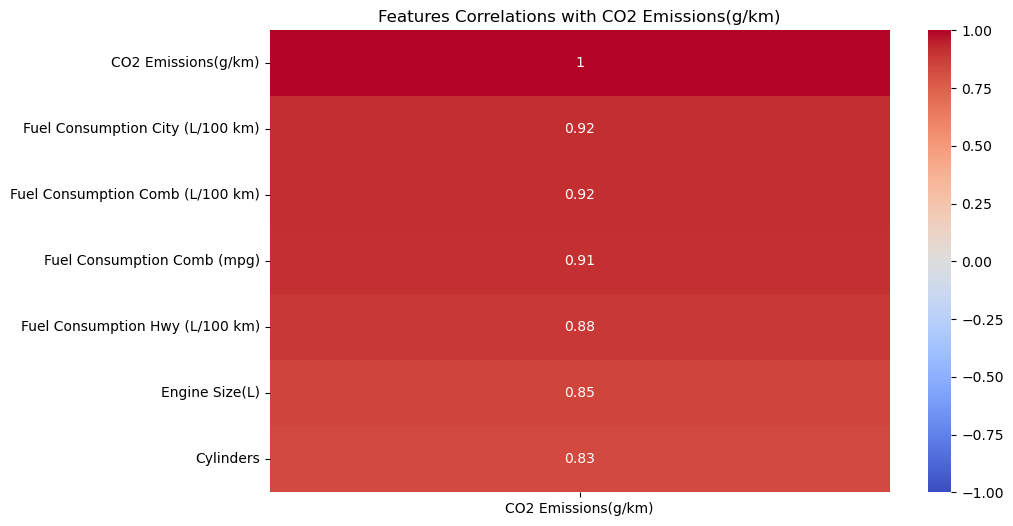

In [213]:
target_column = 'CO2 Emissions(g/km)'
corr_matrix = df.corr()
corr_with_target = corr_matrix[target_column].apply(np.abs).sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title(f'Features Correlations with {target_column}')
plt.show()

## Checking Multi Collinearity

In [214]:
def color_red(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color: {color}'

In [215]:
df.drop(columns=['CO2 Emissions(g/km)']).corr().style.applymap(color_red)

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000


__* Cylinders and Engine Size is seen to be correlated a lot__  
__* There are 3 correlated fuel consumption features, best to eliminate 2 of them__

In [216]:
df.drop(columns=['Cylinders', 
                   'Fuel Consumption Hwy (L/100 km)', 
                   'Fuel Consumption City (L/100 km)',
                   'Fuel Consumption Comb (mpg)'
                  ], inplace=True)

## Exploring The distributions and possible Outliers

In [217]:
numerical_features = df.select_dtypes(include='number').columns

In [218]:
len(numerical_features)

3

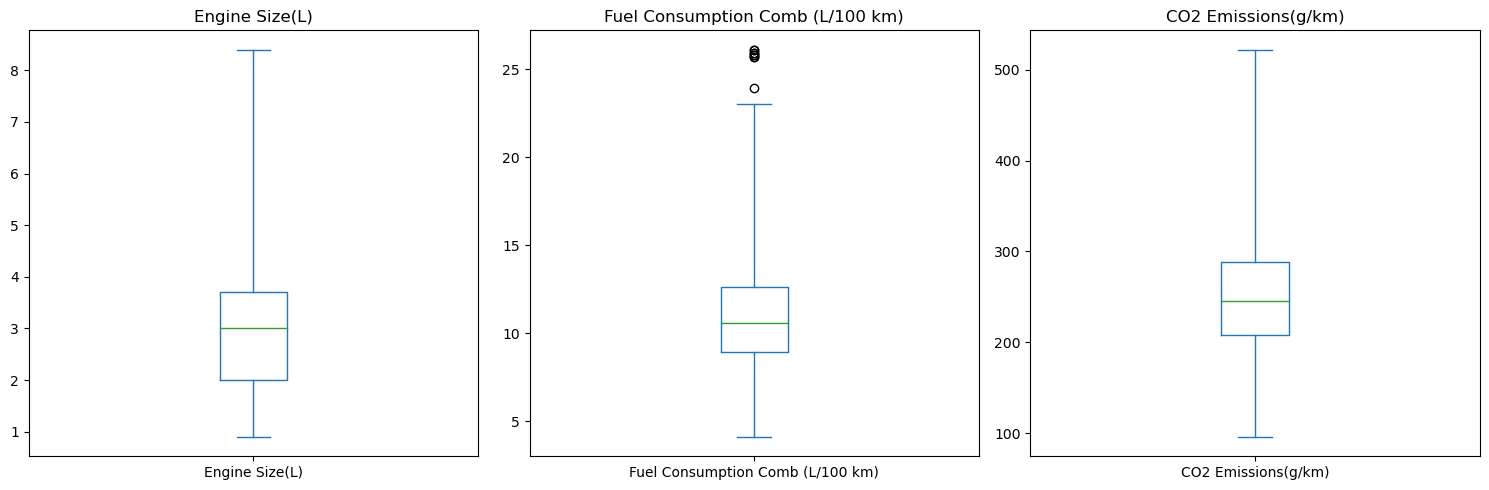

In [219]:
# boxplot for numerical features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()

# Iterate through the columns and create box plots
for i, col in enumerate(numerical_features):
    df[col].plot.box(ax=axes[i], whis=3)
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [220]:
df.skew()

Engine Size(L)                      0.809181
Fuel Consumption Comb (L/100 km)    0.893316
CO2 Emissions(g/km)                 0.526094
dtype: float64

__Altough fuel consumption seem to have outliers, it will not be a good idea to decide them as outliers, since there is a realtiy that some cars can consume a lot and those kind of cars can be available in real world and test data__  

__Also , we check for distribution, since they are not very well normally distributed, but we cant clearly say they are skewed since the skewness are all below 1__

## Categorical Features: Relationship with Target

In [221]:
categorical_features = df.select_dtypes(include='object').columns
categorical_features

Index(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype='object')

In [222]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
Make,7385,42,FORD,628
Model,7385,2053,F-150 FFV 4X4,32
Vehicle Class,7385,16,SUV - SMALL,1217
Transmission,7385,27,AS6,1324
Fuel Type,7385,5,X,3637


__'Model' feature is causing cardinalty. Adds too much complexity to our model, especially killing linear regression model, and for other models it will cost a lot for time consumption, moreover its not adding much value to the model. Better to drop it__

In [223]:
df.drop(columns=['Model'], inplace=True)

In [224]:
# Make Some Changes for better reading in Fuel_type feature
fuel_type_dict = {
     'Z' : 'Premium Gasoline',
     'D' : 'Diesel',
     'X' : 'Regular Gasoline',
     'E' : 'Ethanol (E85)',
     'N' : 'Natural Gas'
}

df['Fuel Type'] = df['Fuel Type'].map(fuel_type_dict)

In [225]:
# Define a function to determine the groups for Transmission Feature
def classify_transmission(transmission):
    if transmission.startswith('AM'):
        return 'AM Group'
    elif transmission.startswith('AV'):
        return 'AV Group'
    elif transmission.startswith('AS'):
        return 'AS Group'
    elif transmission.startswith('A'):
        return 'A Group' if transmission not in ['AM', 'AS', 'AV'] else 'AM/AS/AV Group'
    elif transmission.startswith('M'):
        return 'M Group'
    else:
        return 'Other Group'

# Apply the function to create a new 'Transmission Group' column
df['Transmission Group'] = df['Transmission'].apply(classify_transmission)
df.drop(columns=['Transmission'], inplace=True)

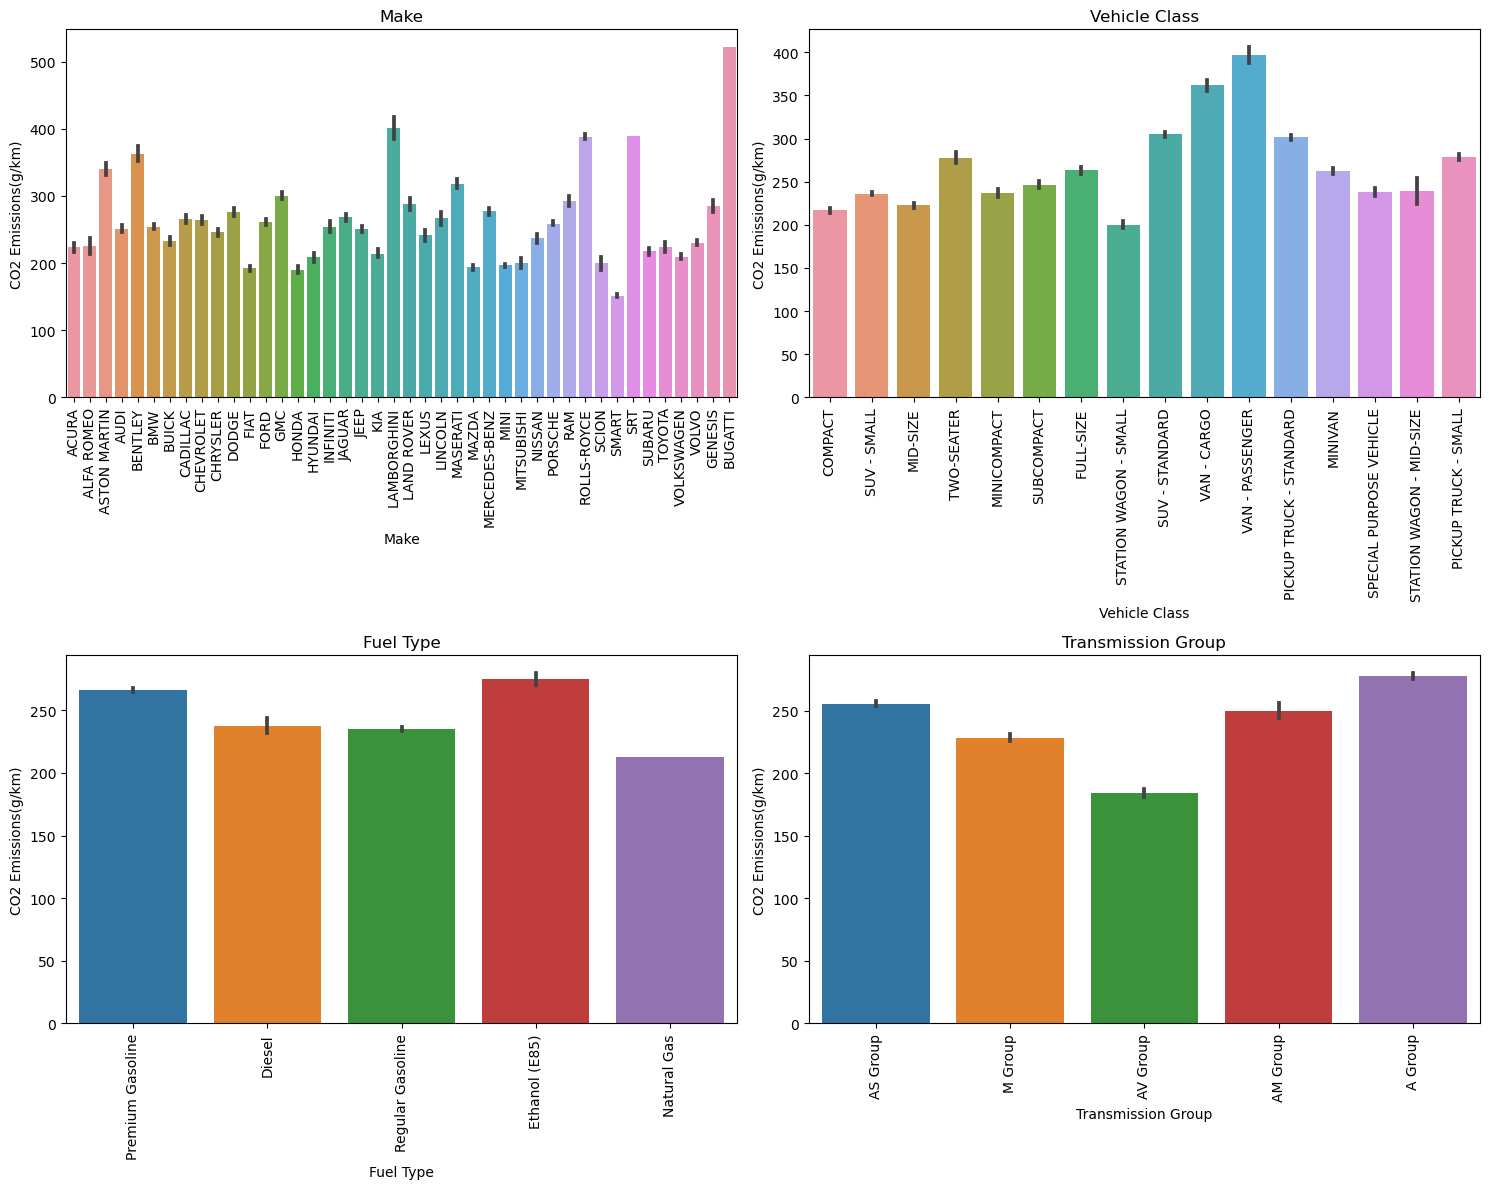

In [226]:
# barplot for categorical features
categorical_features = df.select_dtypes(include='object').columns
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# Iterate through the columns and create box plots
for i, col in enumerate(categorical_features):
    sns.barplot(ax=axes[i], data=df, x=col, y=target_column)
    axes[i].set_title(col)
    axes[i].set_xticklabels(labels=list(df[col].unique()), rotation=90)

plt.tight_layout()
plt.show()

* it is obviously seen that sport or luxury cars like Bugatti, Aston Martin, Bentley or Lamborginhi are coming first when it comes to CO2 emissions due to their big engines  
* Smart, Mazda, mini, fiat are lowest CO2 makes  
* Big cars like Vans, pickup trucks and SUVs are producing CO2 mostly, and also 2 seater sport cars are the second class  
* Lets investigate more for any possible clues for transmission and fuel type

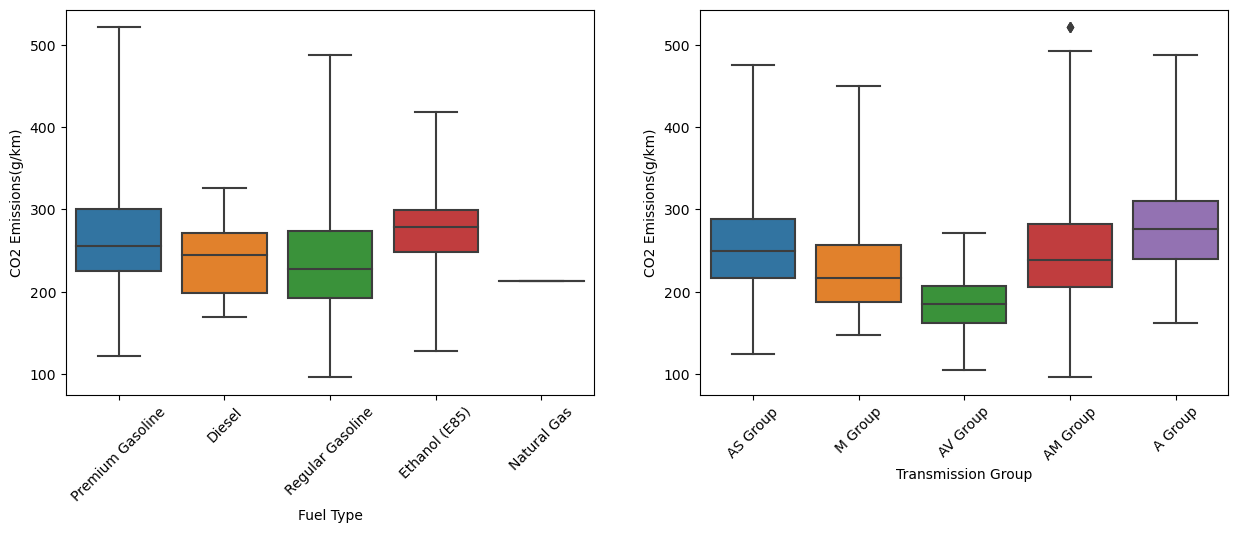

In [227]:
# boxplot for fuel Type and Transmission groups
fig, axes = plt.subplots(1, 2, figsize=(15, 5 ))
sns.boxplot(x='Fuel Type', y=target_column, data=df, whis=3, ax=axes[0])
sns.boxplot(x='Transmission Group', y=target_column, data=df, whis=3, ax=axes[1])

axes[0].set_xticklabels(labels=list(df['Fuel Type'].unique()), rotation=45)
axes[1].set_xticklabels(labels=list(df['Transmission Group'].unique()), rotation=45)

plt.show()

In [228]:
# I want to drop Natural Gas car since its not explaining too much data, there is only 1 observation

df = df[df['Fuel Type'] != 'Natural Gas']

* It's seen than lowest CO2 emission fuel type is natural gas and than regular gasoline. And Ethanol is the highest responsible for CO2 emissions  
* Automatic transmission cars have a higher median CO2 emission value, whereas Continuously variable transmission cars are producing least CO2 emission

## Categorical Features: OneWay ANOVA Test

In [229]:
from scipy.stats import f_oneway

anova_results = pd.DataFrame(columns=['Feature', 'F-Statistic', 'P-Value'])

# Perform ANOVA for each categorical feature
for feature in categorical_features:
    groups = [df[df[feature] == category][target_column] for category in df[feature].unique()]
    f_stat, p_value = f_oneway(*groups)
    
    # Append results to the DataFrame
    anova_results = anova_results.append({'Feature': feature, 'F-Statistic': f_stat, 'P-Value': p_value}, ignore_index=True)
anova_results

,Feature,F-Statistic,P-Value
0,Make,106.817183,0.000000e+00
1,Vehicle Class,265.948526,0.000000e+00
2,Fuel Type,198.445506,8.858264e-124
3,Transmission Group,404.068667,2.902028e-315


__Since all the P-Values are very low (lower than 0.05) we can clearly reject the NULL hypothesis__  
__there are significant differences in the means of the target variable among the categories of each categorical feature.__

# Simple Linear Regression

## Train test split

In [230]:
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.linear_model import LinearRegression
from functions import train_val

In [231]:
X = df['Engine Size(L)'].to_frame()
y = df['CO2 Emissions(g/km)']

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Model building & Evaluation

In [233]:
slinear_model = LinearRegression()

In [234]:
slinear_model.fit(X_train, y_train)

LinearRegression()

In [235]:
y_pred = slinear_model.predict(X_test)
y_train_pred = slinear_model.predict(X_train)

slm_scores = train_val(y_train, y_train_pred, y_test, y_pred, 'simple_linear_model')
slm_scores

,simple_linear_model_train,simple_linear_model_test
R2,0.723803,0.729832
mae,23.406158,22.186499
mse,949.576046,884.178229
rmse,30.815192,29.735135


## Cross Validation

In [236]:
cv_metrics = ('r2', 'neg_root_mean_squared_error')
slm_scores_cv = pd.DataFrame(cross_validate(slinear_model, X, y, cv=5, scoring= cv_metrics)).iloc[:, 2:]
print(f"Average R2 Score: {slm_scores_cv['test_r2'].mean()}")
print(f"Average -RMSE   : {slm_scores_cv['test_neg_root_mean_squared_error'].mean()}\n")
slm_scores_cv

Average R2 Score: 0.7217967888489771
Average -RMSE   : -30.744675986547634



,test_r2,test_neg_root_mean_squared_error
0,0.749272,-30.898052
1,0.710424,-30.799390
2,0.739464,-29.463468
3,0.713853,-29.839289
4,0.695971,-32.723181


# Multiple Linear Regression

## Train test Split - Encoding

In [237]:
from sklearn.preprocessing import StandardScaler

In [238]:
X = df.drop(columns=['CO2 Emissions(g/km)'])
y = df['CO2 Emissions(g/km)']
print(X.shape, '  ', y.shape)

(7384, 6)    (7384,)


In [239]:
categorical_features = X.select_dtypes(include='object').columns

In [240]:
categorical_features

Index(['Make', 'Vehicle Class', 'Fuel Type', 'Transmission Group'], dtype='object')

In [241]:
X_encoded = pd.get_dummies(X, columns=categorical_features, prefix=categorical_features, drop_first=True)
X_encoded.shape

(7384, 65)

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.05, random_state=42)

In [325]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building & Evaluation

In [326]:
mlinear_model = LinearRegression()

In [327]:
mlinear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [328]:
y_pred = mlinear_model.predict(X_test_scaled)
y_train_pred = mlinear_model.predict(X_train_scaled)

mlm_scores = train_val(y_train, y_train_pred, y_test, y_pred, 'multiple_linear_model')
mlm_scores

,multiple_linear_model_train,multiple_linear_model_test
R2,0.992590,0.993307
mae,2.963232,2.724177
mse,25.457553,21.048964
rmse,5.045548,4.587915


## Cross Validation

In [329]:
cv_metrics = ('r2', 'neg_root_mean_squared_error')
slm_scores_cv = pd.DataFrame(cross_validate(mlinear_model, X_encoded, y, cv=10, scoring= cv_metrics)).iloc[:, 2:]
print(f"Average R2 Score: {slm_scores_cv['test_r2'].mean()}")
print(f"Average -RMSE   : {slm_scores_cv['test_neg_root_mean_squared_error'].mean()}\n")
slm_scores_cv

Average R2 Score: 0.9914123949019974
Average -RMSE   : -5.127331123343398



,test_r2,test_neg_root_mean_squared_error
0,0.973124,-10.544390
1,0.990869,-5.586545
2,0.989212,-6.193191
3,0.989357,-5.614528
4,0.992025,-5.047936
5,0.994995,-4.151354
6,0.995039,-4.048226
7,0.995407,-3.660370
8,0.997634,-2.817278
9,0.996462,-3.609493


__It's obvious that linear model is too weak for explaining this huge dataset__

# Ridge Regression - L2 Regularization

## Ridge Model

In [330]:
from sklearn.linear_model import Ridge, RidgeCV

In [331]:
ridge_model = Ridge(random_state=42)

In [332]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(random_state=42)

In [333]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

ridge_scores = train_val(y_train, y_train_pred, y_test, y_pred, 'ridge_model')
ridge_scores

,ridge_model_train,ridge_model_test
R2,0.992589,0.993302
mae,2.969075,2.730296
mse,25.459420,21.062984
rmse,5.045733,4.589443


## Ridge - Cross Validation

In [334]:
cv_metrics = ('r2', 'neg_root_mean_squared_error')
rm_scores_cv = pd.DataFrame(cross_validate(ridge_model, X_encoded, y, cv=10, scoring= cv_metrics)).iloc[:, 2:]
print(f"Average R2 Score: {rm_scores_cv['test_r2'].mean()}")
print(f"Average -RMSE   : {rm_scores_cv['test_neg_root_mean_squared_error'].mean()}\n")
rm_scores_cv

Average R2 Score: 0.9913995386886546
Average -RMSE   : -5.136601534977729



,test_r2,test_neg_root_mean_squared_error
0,0.973032,-10.562531
1,0.990772,-5.615962
2,0.989168,-6.205759
3,0.989563,-5.559895
4,0.992153,-5.007320
5,0.994948,-4.170928
6,0.995120,-4.014745
7,0.995394,-3.665240
8,0.997519,-2.885273
9,0.996325,-3.678362


## Hyperparametre Tuning for Ridge Regression

In [335]:
alpha_space = np.logspace(-3, 2, 100)

In [336]:
ridge_model_hyp = RidgeCV(alphas=alpha_space, cv=10, scoring='neg_root_mean_squared_error')
ridge_model_hyp

RidgeCV(alphas=array([1.00000000e-03, 1.12332403e-03, 1.26185688e-03, 1.41747416e-03,
       1.59228279e-03, 1.78864953e-03, 2.00923300e-03, 2.25701972e-03,
       2.53536449e-03, 2.84803587e-03, 3.19926714e-03, 3.59381366e-03,
       4.03701726e-03, 4.53487851e-03, 5.09413801e-03, 5.72236766e-03,
       6.42807312e-03, 7.22080902e-03, 8.11130831e-03, 9.11162756e-03,
       1.02353102e-02, 1.14975700e-0...
       6.89261210e+00, 7.74263683e+00, 8.69749003e+00, 9.77009957e+00,
       1.09749877e+01, 1.23284674e+01, 1.38488637e+01, 1.55567614e+01,
       1.74752840e+01, 1.96304065e+01, 2.20513074e+01, 2.47707636e+01,
       2.78255940e+01, 3.12571585e+01, 3.51119173e+01, 3.94420606e+01,
       4.43062146e+01, 4.97702356e+01, 5.59081018e+01, 6.28029144e+01,
       7.05480231e+01, 7.92482898e+01, 8.90215085e+01, 1.00000000e+02]),
        cv=10, scoring='neg_root_mean_squared_error')

In [337]:
ridge_model_hyp.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([1.00000000e-03, 1.12332403e-03, 1.26185688e-03, 1.41747416e-03,
       1.59228279e-03, 1.78864953e-03, 2.00923300e-03, 2.25701972e-03,
       2.53536449e-03, 2.84803587e-03, 3.19926714e-03, 3.59381366e-03,
       4.03701726e-03, 4.53487851e-03, 5.09413801e-03, 5.72236766e-03,
       6.42807312e-03, 7.22080902e-03, 8.11130831e-03, 9.11162756e-03,
       1.02353102e-02, 1.14975700e-0...
       6.89261210e+00, 7.74263683e+00, 8.69749003e+00, 9.77009957e+00,
       1.09749877e+01, 1.23284674e+01, 1.38488637e+01, 1.55567614e+01,
       1.74752840e+01, 1.96304065e+01, 2.20513074e+01, 2.47707636e+01,
       2.78255940e+01, 3.12571585e+01, 3.51119173e+01, 3.94420606e+01,
       4.43062146e+01, 4.97702356e+01, 5.59081018e+01, 6.28029144e+01,
       7.05480231e+01, 7.92482898e+01, 8.90215085e+01, 1.00000000e+02]),
        cv=10, scoring='neg_root_mean_squared_error')

In [338]:
ridge_model_hyp.alpha_

0.21049041445120198

In [339]:
ridge_model_hyp.best_score_

-5.107481094177041

In [340]:
y_pred = ridge_model_hyp.predict(X_test_scaled)
y_train_pred = ridge_model_hyp.predict(X_train_scaled)

ridge_scores_hyp = train_val(y_train, y_train_pred, y_test, y_pred, 'ridge_hyp_model')
ridge_scores_hyp

,ridge_hyp_model_train,ridge_hyp_model_test
R2,0.992590,0.993306
mae,2.964431,2.725453
mse,25.457636,21.051607
rmse,5.045556,4.588203


# Lasso Regression - L1 Regularization

## Lasso Model

In [341]:
from sklearn.linear_model import Lasso, LassoCV

In [342]:
lasso_model = Lasso(random_state=42)

In [343]:
lasso_model.fit(X_train_scaled, y_train)

Lasso(random_state=42)

In [344]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

lasso_scores = train_val(y_train, y_train_pred, y_test, y_pred, 'lasso_model')
lasso_scores

,lasso_model_train,lasso_model_test
R2,0.984388,0.983717
mae,4.562837,4.404095
mse,53.635060,51.206891
rmse,7.323596,7.155899


## Lasso - Cross VAlidation

In [345]:
cv_metrics = ('r2', 'neg_root_mean_squared_error')
lm_scores_cv = pd.DataFrame(cross_validate(lasso_model, X_encoded, y, cv=10, scoring= cv_metrics)).iloc[:, 2:]
print(f"Average R2 Score: {lm_scores_cv['test_r2'].mean()}")
print(f"Average -RMSE   : {lm_scores_cv['test_neg_root_mean_squared_error'].mean()}\n")
lm_scores_cv

Average R2 Score: 0.9743242706280618
Average -RMSE   : -9.181802015900361



,test_r2,test_neg_root_mean_squared_error
0,0.937022,-16.141135
1,0.973122,-9.584765
2,0.973398,-9.725300
3,0.978241,-8.028059
4,0.980988,-7.794090
5,0.983948,-7.434544
6,0.976383,-8.832416
7,0.977472,-8.106277
8,0.984702,-7.164392
9,0.977968,-9.007042


## Hyperparametre Tuning for Lasso Regression

In [346]:
alpha_space = np.logspace(-3, 2, 100)

In [347]:
lasso_model_hyp = LassoCV(alphas=alpha_space, cv=10, max_iter=100_000, random_state=42)

In [348]:
lasso_model_hyp.fit(X_train_scaled, y_train)

LassoCV(alphas=array([1.00000000e-03, 1.12332403e-03, 1.26185688e-03, 1.41747416e-03,
       1.59228279e-03, 1.78864953e-03, 2.00923300e-03, 2.25701972e-03,
       2.53536449e-03, 2.84803587e-03, 3.19926714e-03, 3.59381366e-03,
       4.03701726e-03, 4.53487851e-03, 5.09413801e-03, 5.72236766e-03,
       6.42807312e-03, 7.22080902e-03, 8.11130831e-03, 9.11162756e-03,
       1.02353102e-02, 1.14975700e-0...
       6.89261210e+00, 7.74263683e+00, 8.69749003e+00, 9.77009957e+00,
       1.09749877e+01, 1.23284674e+01, 1.38488637e+01, 1.55567614e+01,
       1.74752840e+01, 1.96304065e+01, 2.20513074e+01, 2.47707636e+01,
       2.78255940e+01, 3.12571585e+01, 3.51119173e+01, 3.94420606e+01,
       4.43062146e+01, 4.97702356e+01, 5.59081018e+01, 6.28029144e+01,
       7.05480231e+01, 7.92482898e+01, 8.90215085e+01, 1.00000000e+02]),
        cv=10, max_iter=100000, random_state=42)

In [349]:
lasso_model_hyp.alpha_

0.001

In [350]:
y_pred = lasso_model_hyp.predict(X_test_scaled)
y_train_pred = lasso_model_hyp.predict(X_train_scaled)

lasso_scores_hyp = train_val(y_train, y_train_pred, y_test, y_pred, 'lasso_hyp_model')
lasso_scores_hyp

,lasso_hyp_model_train,lasso_hyp_model_test
R2,0.992590,0.993305
mae,2.963140,2.726748
mse,25.458738,21.053683
rmse,5.045665,4.588429


# Comparing all models

In [351]:
compare_results_df = pd.concat([slm_scores, mlm_scores, ridge_scores_hyp, lasso_scores_hyp], axis=1)
column_names = ['SL_train', 'SL_test', 'ML_train', 'ML_test', 'Ridge_train', 'Ridge_test', 'Lasso_train', 'Lasso_test']
compare_results_df.columns = column_names
compare_results_df

,SL_train,SL_test,ML_train,ML_test,Ridge_train,Ridge_test,Lasso_train,Lasso_test
R2,0.723803,0.729832,0.992590,0.993307,0.992590,0.993306,0.992590,0.993305
mae,23.406158,22.186499,2.963232,2.724177,2.964431,2.725453,2.963140,2.726748
mse,949.576046,884.178229,25.457553,21.048964,25.457636,21.051607,25.458738,21.053683
rmse,30.815192,29.735135,5.045548,4.587915,5.045556,4.588203,5.045665,4.588429


__Altough Ridge and Lasso results are very similar, i will prefer Lasso Regularization due to its simplicity over features__

# Best Model Feature Importances

__After finding the best alpha, we should fit the model with Lasso for final check, and with best alpha value__

In [352]:
best_alpha = round(lasso_model_hyp.alpha_, 3)
best_alpha

0.001

In [353]:
best_model = Lasso(alpha=best_alpha, random_state=42)
best_model.fit(X_train_scaled, y_train)

Lasso(alpha=0.001, random_state=42)

In [354]:
y_pred = best_model.predict(X_test_scaled)
y_train_pred = best_model.predict(X_train_scaled)

best_scores = train_val(y_train, y_train_pred, y_test, y_pred, 'best_model')
best_scores

,best_model_train,best_model_test
R2,0.992590,0.993305
mae,2.963140,2.726748
mse,25.458738,21.053683
rmse,5.045665,4.588429


In [355]:
# Cross VAlidate the best scores
cv_metrics = ('r2', 'neg_root_mean_squared_error')
best_model_scores = pd.DataFrame(cross_validate(best_model, X_encoded, y, cv=10, scoring= cv_metrics)).iloc[:, 2:]
print(f"Average R2 Score: {best_model_scores['test_r2'].mean()}")
print(f"Average -RMSE   : {best_model_scores['test_neg_root_mean_squared_error'].mean()}\n")
best_model_scores

Average R2 Score: 0.9913976409674901
Average -RMSE   : -5.1281087052347125



,test_r2,test_neg_root_mean_squared_error
0,0.972906,-10.587089
1,0.990852,-5.591848
2,0.989223,-6.189985
3,0.989344,-5.618153
4,0.992040,-5.043364
5,0.995018,-4.141994
6,0.995045,-4.045524
7,0.995427,-3.652183
8,0.997662,-2.800984
9,0.996461,-3.609963


In [356]:
feature_importances = np.abs(best_model.coef_)
importances_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
importances_df.head()

,Feature,Importance
1,Fuel Consumption Comb (L/100 km),64.163230
58,Fuel Type_Ethanol (E85),30.963766
60,Fuel Type_Regular Gasoline,14.948959
59,Fuel Type_Premium Gasoline,14.017198
0,Engine Size(L),1.228016


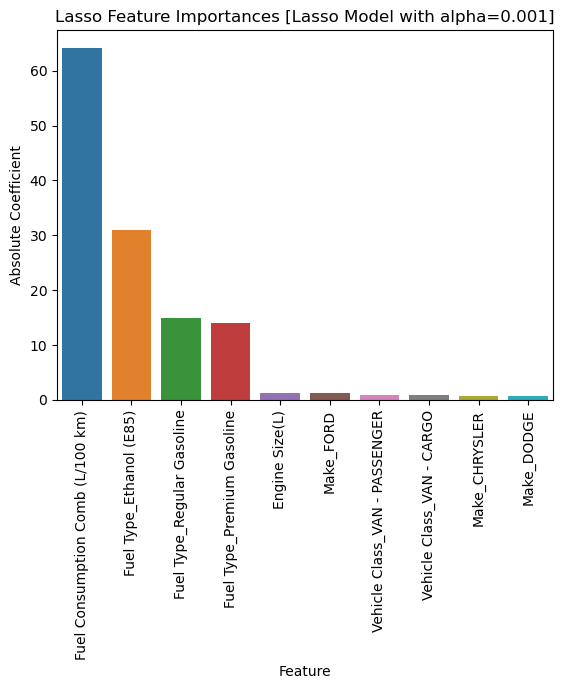

In [357]:
sns.barplot(importances_df['Feature'].head(10), importances_df['Importance'].head(10))
plt.xlabel('Feature')
plt.ylabel('Absolute Coefficient')
plt.title(f'Lasso Feature Importances [Lasso Model with alpha={best_alpha}]')
plt.xticks(rotation=90)
plt.show()

# Feature Selection

In [358]:
X_encoded.shape

(7384, 65)

**Currently we have 66 features**  
**Lets iterate Lasso Regularization over different number of features** 

In [359]:
selected_scores = {}

for n in [3, 5, 10, 20, 30, 40, 66]:
    features_selected = list(importances_df.head(n)['Feature'].values)
    X_selected = pd.DataFrame(X_encoded, columns=X_encoded.columns)[features_selected]
    
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=42)
    final_scaler = StandardScaler()
    X_train_scaled = final_scaler.fit_transform(X_train)
    X_test_scaled = final_scaler.transform(X_test)
    
    model_n_lasso = Lasso(alpha=best_alpha, random_state=42)
    model_n_lasso.fit(X_train_scaled, y_train)
    y_pred = model_n_lasso.predict(X_test_scaled)
    y_train_pred = model_n_lasso.predict(X_train_scaled)
    
    selected_scores[str(n)] = train_val(y_train, y_train_pred, y_test, y_pred, str(n)+'_features')

selected_scores

{'3':       3_features_train  3_features_test
 R2            0.985232         0.985268
 mae           3.986461         3.834455
 mse          50.772120        48.214707
 rmse          7.125456         6.943681,
 '5':       5_features_train  5_features_test
 R2            0.991227         0.992138
 mae           3.124171         2.903884
 mse          30.163112        25.728362
 rmse          5.492095         5.072313,
 '10':       10_features_train  10_features_test
 R2             0.992181          0.992538
 mae            3.020239          2.888610
 mse           26.881819         24.419350
 rmse           5.184768          4.941594,
 '20':       20_features_train  20_features_test
 R2             0.992298          0.992591
 mae            2.995321          2.862253
 mse           26.480920         24.247693
 rmse           5.145962          4.924195,
 '30':       30_features_train  30_features_test
 R2             0.992426          0.992770
 mae            2.976295          2.817946

In [360]:
r2_scores = [selected_scores[key].iloc[0,1] for key in selected_scores] 
rmse_scores = [selected_scores[key].iloc[3,1] for key in selected_scores]
feature_quantities = [int(key) for key in selected_scores.keys()]
feature_quantities

[3, 5, 10, 20, 30, 40, 66]

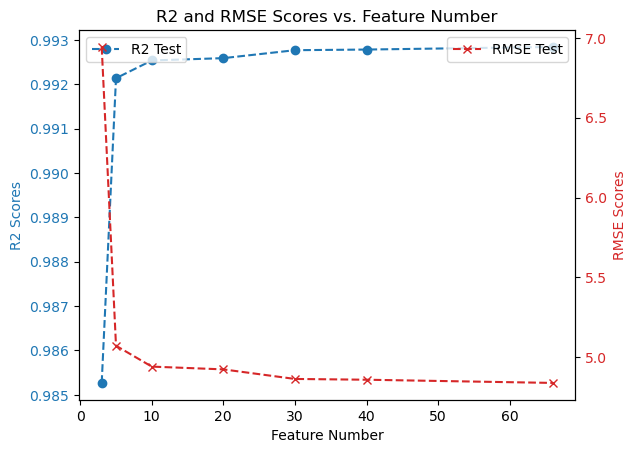

In [361]:
fig, ax1 = plt.subplots()

# Plot R2 Test scores
color = 'tab:blue'
ax1.set_xlabel('Feature Number')
ax1.set_ylabel('R2 Scores', color=color)
ax1.plot(feature_quantities, r2_scores, marker='o', label='R2 Test', linestyle='dashed', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

# Create a second y-axis for RMSE scores
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('RMSE Scores', color=color)
ax2.plot(feature_quantities, rmse_scores, marker='x', label='RMSE Test', linestyle='dashed', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('R2 and RMSE Scores vs. Feature Number')
plt.show()

__As we see above in the graph, as number of features increase the scores are getting better.__  
__However, after 10 features, the scores are only getting very slightly better but the cost of collecting data is increasing on the other hand.__  
__Therefore we continue to our final model with 10 features__

# Final Model

In [362]:
n = 10

In [363]:
features_selected = importances_df.head(n)['Feature'].values
features_selected

array(['Fuel Consumption Comb (L/100 km)', 'Fuel Type_Ethanol (E85)',
       'Fuel Type_Regular Gasoline', 'Fuel Type_Premium Gasoline',
       'Engine Size(L)', 'Make_FORD', 'Vehicle Class_VAN - PASSENGER',
       'Vehicle Class_VAN - CARGO', 'Make_CHRYSLER', 'Make_DODGE'],
      dtype=object)

In [364]:
X_selected = pd.DataFrame(X_encoded, columns=X_encoded.columns)[features_selected]
final_scaler = StandardScaler()
X_selected_scaled = final_scaler.fit_transform(X_selected)

final_model = Lasso(alpha=best_alpha, random_state=42)
final_model.fit(X_selected_scaled, y)

Lasso(alpha=0.001, random_state=42)